# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


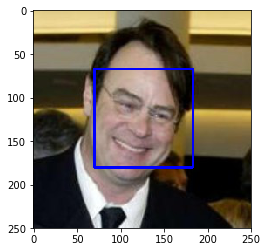

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [94]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
N_humans = 0
N_dogs = 0
for human in human_files_short:
    if face_detector(human):
        N_humans += 1
for dog in dog_files_short:
    if face_detector(dog):
        N_dogs += 1

print('{}% of human images have a human face'.format(N_humans))
print('{}% of dog images have a human face'.format(N_dogs))

98% of human images have a human face
17% of dog images have a human face


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 102237635.74it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import torchvision.transforms as transforms
from torch import nn

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    image = Image.open(img_path)
    resized = transforms.Resize([224, 224])(image)
    x = transforms.functional.to_tensor(resized)
    if use_cuda:
        x = x.cuda()
    output = VGG16.forward(x.view([1, 3, 224, 224]))
    _, pred = torch.max(output, 1)   
    
    return pred.cpu().numpy()[0] # predicted class index

In [8]:
path = '/data/dog_images/train/001.Affenpinscher/Affenpinscher_00001.jpg'
VGG16_predict(path)

252

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [9]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    idx = VGG16_predict(img_path)
    return 151 <= idx <= 268  # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [10]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

N_humans = 0
N_dogs = 0
for human in human_files_short:
    if dog_detector(human):
        N_humans += 1
for dog in dog_files_short:
    if dog_detector(dog):
        N_dogs += 1

print('{}% of human images have a dog detected'.format(N_humans))
print('{}% of dog images have a dog detected'.format(N_dogs))

0% of human images have a dog detected
93% of dog images have a dog detected


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [11]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [17]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

data_transform = transforms.Compose([transforms.Resize([256, 256]), 
                                     transforms.RandomHorizontalFlip(),
                                     transforms.RandomRotation(10),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dir = '/data/dog_images/train/'
test_dir = '/data/dog_images/test/'
valid_dir = '/data/dog_images/valid/'
train_data = datasets.ImageFolder(train_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=data_transform)

# define dataloader parameters
batch_size = 20
num_workers=0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)

loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}
class_names = train_data.classes

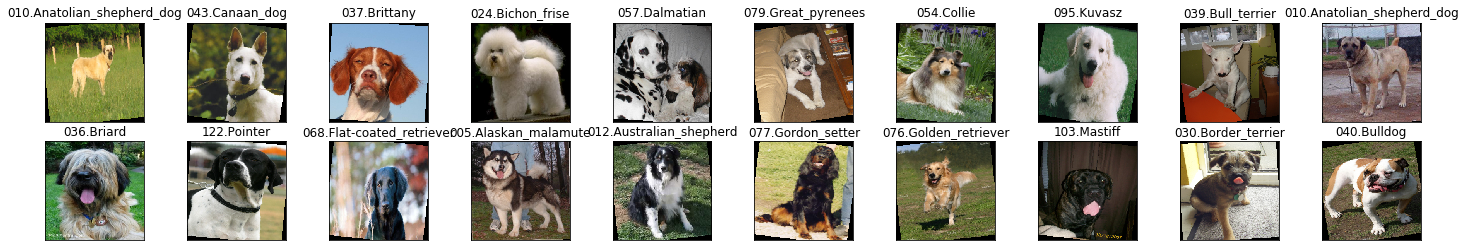

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(class_names[labels[idx]])

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: 
- The images are resized by the transforms in `data_transform`. First I resize the images to size of [256, 256], basically because I can recognize the dog type myself at this resolution, so I suppose the neural network does not need more resolution either. The images are also normalized as input for the network.
- I decided to agument the data because the dogs can always appear on an angle in real life as well. I added a horizontal flip and a small 10 degree rotation augmentation for this reason. I also could have added translations as dogs can appear at any position in the image.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [52]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture

networks = {}

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5, padding=2)
        self.conv2 = nn.Conv2d(16, 32, 5, padding=2)
        self.conv3 = nn.Conv2d(32, 64, 5, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 133)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #  -> [16, 128, 128]
        x = self.pool(F.relu(self.conv2(x))) #  -> [32, 64, 64]
        x = self.pool(F.relu(self.conv3(x))) #  -> [64, 32, 32]
        x = x.view(-1, 64 * 32 * 32)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

networks['base'] = Net()
    
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5, padding=2)
        self.conv2 = nn.Conv2d(16, 32, 5, padding=2)
        self.conv3 = nn.Conv2d(32, 64, 5, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 133)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #  -> [16, 128, 128]
        x = self.pool(F.relu(self.conv2(x))) #  -> [32, 64, 64]
        x = self.pool(F.relu(self.conv3(x))) #  -> [64, 32, 32]
        x = x.view(-1, 64 * 32 * 32)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x
    
networks['dropout'] = Net()

class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 2, padding=1)
        self.conv3_bn = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 32 * 32, 500)
        self.fc1_bn = nn.BatchNorm1d(500)
        self.fc2 = nn.Linear(500, 133)
        
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.elu(self.conv1(x)))
        x = self.pool(F.elu(self.conv2(x)))
        x = self.pool(self.conv3_bn(F.elu(self.conv3(x))))
        x = x.view(-1, 64 * 32 * 32)
        x = F.relu(self.fc1_bn(self.fc1(x)))
        x = self.fc2(x)
        return x
    
networks['batch_normalize'] = Net()
    
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 2, padding=1)
        self.conv3_bn = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 32 * 32, 500)
        self.fc1_bn = nn.BatchNorm1d(500)
        self.fc2 = nn.Linear(500, 133)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.elu(self.conv1(x)))
        x = self.pool(F.elu(self.conv2(x)))
        x = self.pool(self.conv3_bn(F.elu(self.conv3(x))))
        x = x.view(-1, 64 * 32 * 32)
        x = self.dropout(x)
        x = F.relu(self.fc1_bn(self.fc1(x)))
        x = self.dropout(x)
        x = self.fc2(x)
        return x
    
networks['dropout_batch_normalize'] = Net()
    
#-#-# You so NOT have to modify the code below this line. #-#-#

# move tensors to GPU if CUDA is available
if use_cuda:
    for network in networks.values():
        network.cuda()

In [53]:
networks['dropout_batch_normalize']

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv3_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=65536, out_features=500, bias=True)
  (fc1_bn): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=500, out_features=133, bias=True)
  (dropout): Dropout(p=0.25)
)

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__

My general approach was to approach the dog classification task similar to the CIFAR dataset, with several convolutional layers, followed with several fully connected layers to finally classify the dog type.

I added 4 versions of a classification network.
- One that is based on the CIFAR network in the tutorial, but added an extra convolutional layer and fully connected layer because we have many more categories than in the CIFAR dataset (10 versus 100+).
- One that adds Dropout at the fully connected layers to the CIFAR network to regularize the training.
- One that adds BatchNormalization at the convolutional and fully connected layers, as the literature says this normalizes the "covariate shift" of the input between layers, allowing higher training rates and faster convergence.
- One that adds both the dropout and batch normalization

Aside from these versions, I also try 2 optimizers (SGD and ADAM), see below

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [54]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizers = {}
for name, network in networks.items():
#     optimizers[name] = optim.SGD(network.parameters(), lr=0.001, momentum=0.9)
    optimizers[name] = optim.Adam(network.parameters(), lr = 0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [55]:
import signal

from contextlib import contextmanager

import requests


DELAY = INTERVAL = 4 * 60  # interval time in seconds
MIN_DELAY = MIN_INTERVAL = 2 * 60
KEEPALIVE_URL = "https://nebula.udacity.com/api/v1/remote/keep-alive"
TOKEN_URL = "http://metadata.google.internal/computeMetadata/v1/instance/attributes/keep_alive_token"
TOKEN_HEADERS = {"Metadata-Flavor":"Google"}


def _request_handler(headers):
    def _handler(signum, frame):
        requests.request("POST", KEEPALIVE_URL, headers=headers)
    return _handler


@contextmanager
def active_session(delay=DELAY, interval=INTERVAL):
    """
    Example:

    from workspace_utils import active session

    with active_session():
        # do long-running work here
    """
    token = requests.request("GET", TOKEN_URL, headers=TOKEN_HEADERS).text
    headers = {'Authorization': "STAR " + token}
    delay = max(delay, MIN_DELAY)
    interval = max(interval, MIN_INTERVAL)
    original_handler = signal.getsignal(signal.SIGALRM)
    try:
        signal.signal(signal.SIGALRM, _request_handler(headers))
        signal.setitimer(signal.ITIMER_REAL, delay, interval)
        yield
    finally:
        signal.signal(signal.SIGALRM, original_handler)
        signal.setitimer(signal.ITIMER_REAL, 0)


def keep_awake(iterable, delay=DELAY, interval=INTERVAL):
    """
    Example:

    from workspace_utils import keep_awake

    for i in keep_awake(range(5)):
        # do iteration with lots of work here
    """
    with active_session(delay, interval): yield from iterable

In [38]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path, patience=5):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    train_losses = []
    valid_losses = []
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        train_losses.append(train_loss)
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
        valid_losses.append(valid_loss)

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            ctr_patience = 0
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        else:
            ctr_patience += 1
            
        if ctr_patience == patience:
            print('Lost patience at epoch {}'.format(epoch))
            break
            
    # return trained model
    return model, train_losses, valid_losses

In [58]:
# train the model

train_losses = {}
valid_losses = {}
with active_session():
    for name, network in networks.items():
        savename = name + '_adam.pt'
        print(savename)
        optimizer = optimizers[name]
        network, train_loss, valid_loss = train(
            100, loaders_scratch, network, optimizer, criterion_scratch, use_cuda, savename)
        np.savetxt(name + '_adam_train.txt', np.array(train_loss))
        np.savetxt(name + '_adam_valid.txt', np.array(valid_loss))
        train_losses[name] = train_loss
        valid_losses[name] = valid_loss

base_adam.pt
Epoch: 1 	Training Loss: 4.883115 	Validation Loss: 4.871983
Validation loss decreased (inf --> 4.871983).  Saving model ...
Epoch: 2 	Training Loss: 4.872097 	Validation Loss: 4.868849
Validation loss decreased (4.871983 --> 4.868849).  Saving model ...
Epoch: 3 	Training Loss: 4.868974 	Validation Loss: 4.868943
Epoch: 4 	Training Loss: 4.867292 	Validation Loss: 4.868442
Validation loss decreased (4.868849 --> 4.868442).  Saving model ...
Epoch: 5 	Training Loss: 4.866926 	Validation Loss: 4.868543
Epoch: 6 	Training Loss: 4.866510 	Validation Loss: 4.868039
Validation loss decreased (4.868442 --> 4.868039).  Saving model ...
Epoch: 7 	Training Loss: 4.866477 	Validation Loss: 4.868426
Epoch: 8 	Training Loss: 4.866186 	Validation Loss: 4.868408
Epoch: 9 	Training Loss: 4.865973 	Validation Loss: 4.868302
Epoch: 10 	Training Loss: 4.865804 	Validation Loss: 4.868765
Epoch: 11 	Training Loss: 4.865771 	Validation Loss: 4.868674
Lost patience at epoch 11
dropout_adam.pt
E

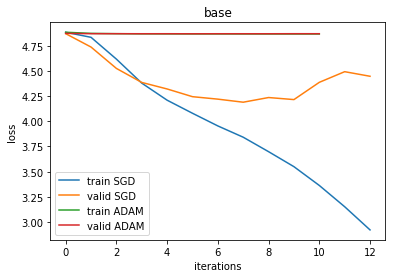

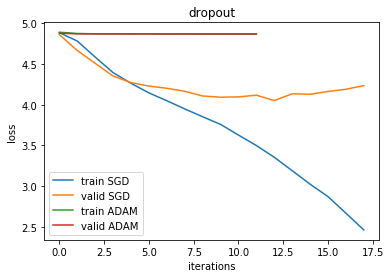

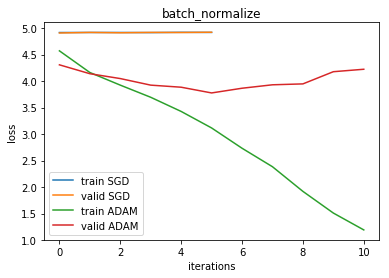

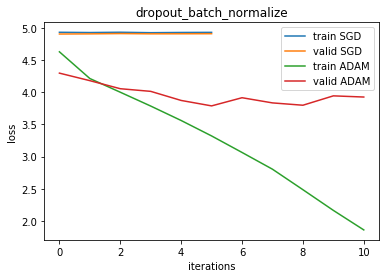

In [91]:
for network_name in networks.keys():
    train_sgd = np.loadtxt(network_name + '_train.txt')
    train_adam = np.loadtxt(network_name + '_adam_train.txt')
    valid_sgd = np.loadtxt(network_name + '_valid.txt')
    valid_adam = np.loadtxt(network_name + '_adam_valid.txt')
    plt.figure()
    plt.title(network_name)
    plt.plot(train_sgd, label='train SGD')
    plt.plot(valid_sgd, label='valid SGD')
    plt.plot(train_adam, label='train ADAM')
    plt.plot(valid_adam, label='valid ADAM')
    plt.legend()
    plt.xlabel('iterations')
    plt.ylabel('loss')

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [49]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [59]:
for name, network in networks.items():
    savename = name + '.pt'
    network.load_state_dict(torch.load(savename))
    print(savename)
    test(loaders_scratch, network, criterion_scratch, use_cuda)
    savename = name + '_adam.pt'
    network.load_state_dict(torch.load(savename))
    print(savename)
    test(loaders_scratch, network, criterion_scratch, use_cuda)

base.pt
Test Loss: 4.164678


Test Accuracy:  7% (62/836)
base_adam.pt
Test Loss: 4.855856


Test Accuracy:  1% (10/836)
dropout.pt
Test Loss: 3.997407


Test Accuracy:  8% (73/836)
dropout_adam.pt
Test Loss: 4.855790


Test Accuracy:  1% (10/836)
batch_normalize.pt
Test Loss: 4.900819


Test Accuracy:  0% ( 6/836)
batch_normalize_adam.pt
Test Loss: 3.757454


Test Accuracy: 13% (113/836)
dropout_batch_normalize.pt
Test Loss: 4.923068


Test Accuracy:  0% ( 4/836)
dropout_batch_normalize_adam.pt
Test Loss: 3.770356


Test Accuracy: 12% (102/836)


I don't really understand the details of how changing the optimizer (SGD vs ADAM) can have such huge differences with the same parameters.
- SGD works well with standard model and with dropout, but is terrible with batch normalization. 
- ADAM has the opposite, working poorly with standard models but adding batch normalization surpasses the 10% threshold.

I suppose that the learning rate should be tuned for each of the optimizers and adding batch normalization or not. I read that a learning-rate fitter can also be used to tune the learning rate as we go, but this is beyond the scpoe of the issue.

---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [71]:
## TODO: Specify data loaders

import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

data_transform = transforms.Compose([transforms.Resize([224, 224]), 
                                     transforms.RandomHorizontalFlip(),
                                     transforms.RandomRotation(10),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dir = '/data/dog_images/train/'
test_dir = '/data/dog_images/test/'
valid_dir = '/data/dog_images/valid/'
train_data = datasets.ImageFolder(train_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=data_transform)

# define dataloader parameters
batch_size = 20
num_workers=0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)

loaders_transfer = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}
class_names = train_data.classes

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [76]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True)
# Freeze training for all "features" layers
for param in model_transfer.features.parameters():
    param.requires_grad = False

n_inputs = model_transfer.classifier[6].in_features

last_layer = nn.Linear(n_inputs, len(class_names))

model_transfer.classifier[6] = last_layer

if use_cuda:
    model_transfer = model_transfer.cuda()

In [73]:
model_transfer

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
I took the vgg16 as a base because this network has already been trained to classify various similar objects and animals.

After fixing the parameters of the vgg16 network, yhe only thing I did was replace the final classification layer with a fully connected layer of the size of the number of labels for our dog types.

I believe it is reasonable to do this because our data of interest (dogs) is quite close to the data that was used to train the vgg16 data (which already has dogs), so using transfer learning is justified.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [74]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [78]:
# train the model
model_transfer, train_loss, valid_loss = train(
    100,
    loaders_transfer,
    model_transfer,
    optimizer_transfer,
    criterion_transfer,
    use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [79]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.610330


Test Accuracy: 80% (676/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [83]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    data_transform = transforms.Compose([
        transforms.Resize([224, 224]), 
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    
    image_pil = Image.open(img_path)
    img_tensor = data_transform(image_pil)
    image = img_tensor.unsqueeze_(0)
    if use_cuda:
        image = image.cuda()
    prediction = model_transfer(image)
    
    breed_class = prediction.argmax()
    
    breed = class_names[breed_class]

    return breed

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [122]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    image = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(cv_rgb)
    if dog_detector(img_path) == True:
        breed = predict_breed_transfer(img_path)
        msg = "Dog detected!\n"
        msg += "Breed is " + breed + "."
    elif face_detector(img_path) == True:
        msg = "Hello, human!\n"
        breed = predict_breed_transfer(img_path)
        msg += "You resemble a " + breed + "!"
    else:
        msg = "I detect neither a dog nor a human in this image."
    plt.title(msg)

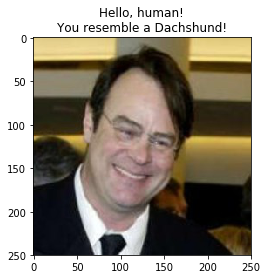

In [123]:
run_app(human_files[0])

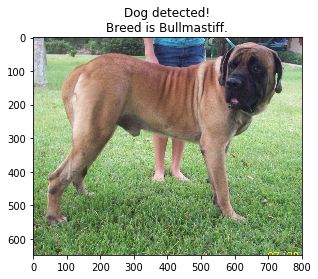

In [124]:
run_app(dog_files[0])

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

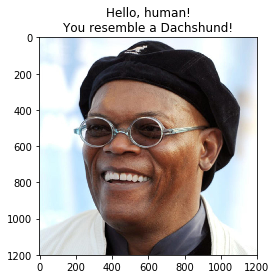

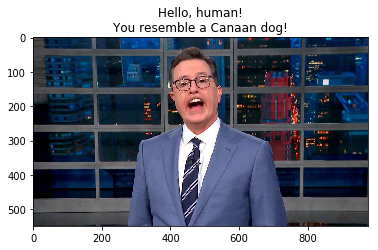

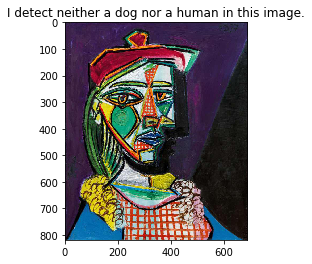

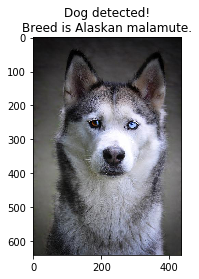

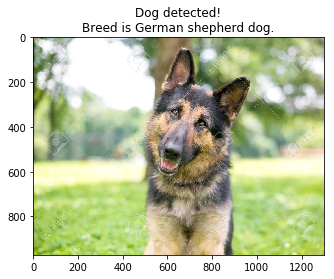

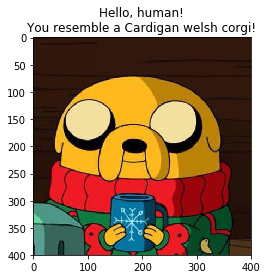

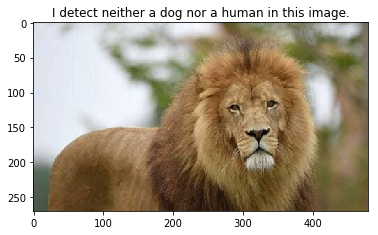

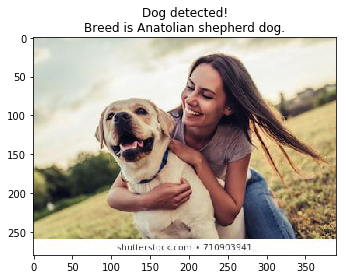

In [127]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
from PIL import Image
import requests
from io import BytesIO

def download_image_from_url(url, filepath):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))    
    img.save(filepath)


sam_jackson_url = 'https://www.biography.com/.image/t_share/MTIwNjA4NjM0MDM0NDIzMzA4/samuel-l.jpg'
sam_jackson_path = 'samual_jackson.jpg'
download_image_from_url(sam_jackson_url, sam_jackson_path)

stephen_colbert_url = 'https://img.thedailybeast.com/image/upload/c_crop,d_placeholder_euli9k,h_549,w_976,x_0,y_0/dpr_2.0/c_limit,w_740/fl_lossy,q_auto/v1526102006/Screen_Shot_2018-05-12_at_1.03.45_AM_vswhif'
stephen_colbert_path = 'stephen_colbert.jpg'
download_image_from_url(stephen_colbert_url, stephen_colbert_path)

picasso_url = 'https://img.lemde.fr/2018/01/15/0/0/2234/2660/688/0/60/0/d2c98a6_26190-1mom9q2.1wcx.jpg'
picasso_path = 'picasso.jpg'
download_image_from_url(picasso_url, picasso_path)

husky_url = 'https://worlddogfinder.com/upload/editor/husky_dog_eyes_5q9hUR40mQ.jpg'
husky_path = 'husky.jpg'
download_image_from_url(husky_url, husky_path)

german_sheppard_url = 'https://previews.123rf.com/images/maryswift/maryswift1804/maryswift180400053/100183500-a-friendly-german-shepherd-dog-listening-with-a-head-tilt.jpg'
german_sheppard_path = 'german_sheppard.jpg'
download_image_from_url(german_sheppard_url, german_sheppard_path)

jake_the_dog_url = 'https://pbs.twimg.com/profile_images/1043136962671140864/ia4MDLcu_400x400.jpg'
jake_the_dog_path = 'jake_the_dog.jpg'
download_image_from_url(jake_the_dog_url, jake_the_dog_path)

lion_url = 'https://media.ouest-france.fr/v1/pictures/MjAxODEyMGJiYTFjZTY3MjFjMmE5NGI2NDk3MjRhYTY2MTljNDM?width=480&height=270&focuspoint=50%2C25&cropresize=1&client_id=bpeditorial&sign=bbe978ba88e6c2b031ebba7c3efff326e8abc1732562b26008d4e4188b68dcc0'
lion_path = 'lion.jpg'
download_image_from_url(lion_url, lion_path)

human_with_labrador_url = 'https://image.shutterstock.com/image-photo/attractive-young-woman-labrador-outdoors-260nw-710903941.jpg'
human_with_labrador_path = 'human_with_labrador.jpg'
download_image_from_url(human_with_labrador_url, human_with_labrador_path)

paths = [
    sam_jackson_path,
    stephen_colbert_path,
    picasso_path,
    husky_path,
    german_sheppard_path,
    jake_the_dog_path,
    lion_path,
    human_with_labrador_path
]

for path in paths:
    run_app(path)

__Answer:__ (Three possible points for improvement)
For the current architecture we already ran until the patience run out (validation loss did not increase for 5 epochs). What we can try to improve the app:
- The algorithm is build to detect either a human or a dog, but it cannot detect multiple types of dogs at the same time. It would need to first locate different dogs in the image and then catagorize them separately.
- The algorithm detects cartoon dogs as humans and abstract painting of humans are not detected as humans. The face detector it seems is not super reliable, and would need to be improved.
- the dog in the last image is a labrador, not an anatolian shepherd dog. The dog detector can still be improved to be more accurate. We can either add more data to train with, or we can try to more layers in the classifier or add dropout to make the network generalize better.